# Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
path_images = 'malaria/images' 

002f20ad-2ace-499c-9335-c9080bc3e6b5.png
malaria/images\002f20ad-2ace-499c-9335-c9080bc3e6b5.png


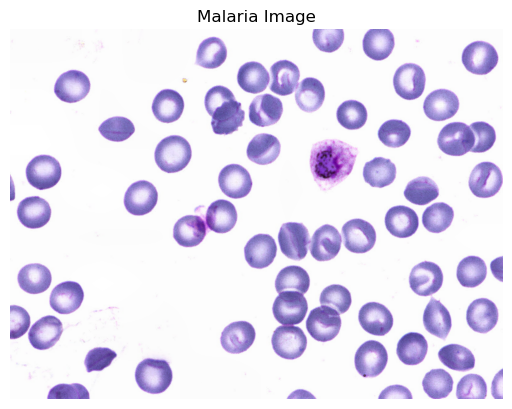

003a89b0-a095-417a-8dd6-f408339bbc68.png
malaria/images\003a89b0-a095-417a-8dd6-f408339bbc68.png


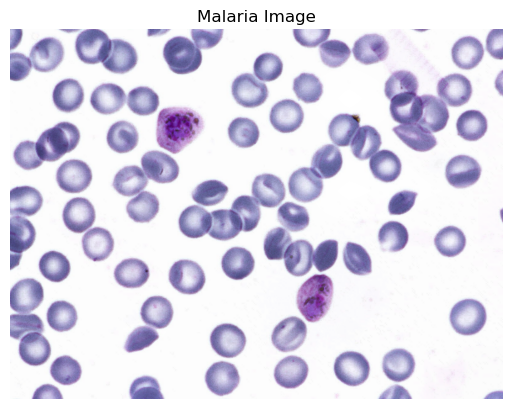

003d1cdc-0aec-430b-90e0-f4d82135b1ac.png
malaria/images\003d1cdc-0aec-430b-90e0-f4d82135b1ac.png


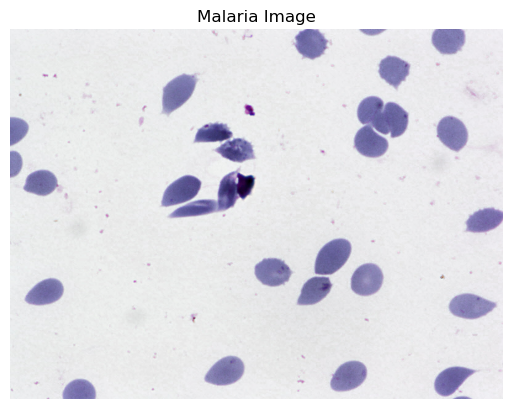

005e60b6-77b8-458c-b57c-bfe0c7e7df78.png
malaria/images\005e60b6-77b8-458c-b57c-bfe0c7e7df78.png


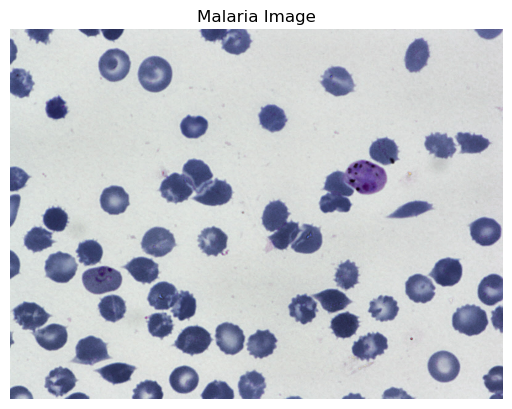

00a02700-2ea2-4590-9e15-ffc9160fd3de.png
malaria/images\00a02700-2ea2-4590-9e15-ffc9160fd3de.png


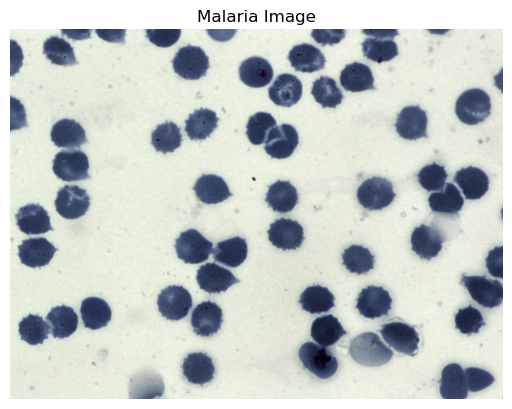

00c8364b-8c85-4502-bcfe-64736fe76815.png
malaria/images\00c8364b-8c85-4502-bcfe-64736fe76815.png


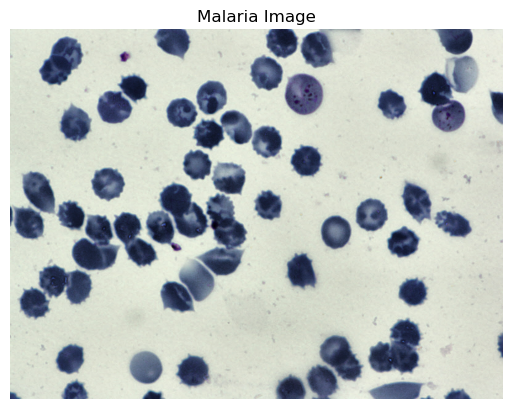

00d04a90-80e5-4bce-9511-1b64eabb7a47.png
malaria/images\00d04a90-80e5-4bce-9511-1b64eabb7a47.png


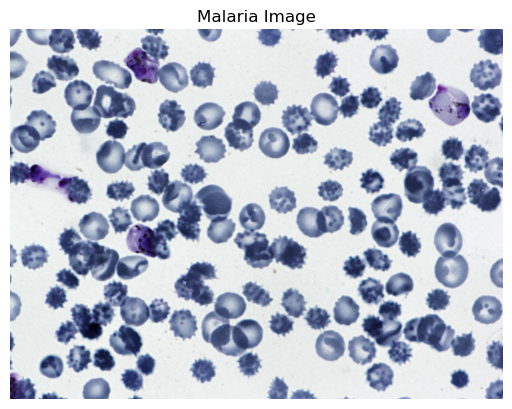

010961af-b38c-49de-aca0-e3732d73d414.jpg
malaria/images\010961af-b38c-49de-aca0-e3732d73d414.jpg


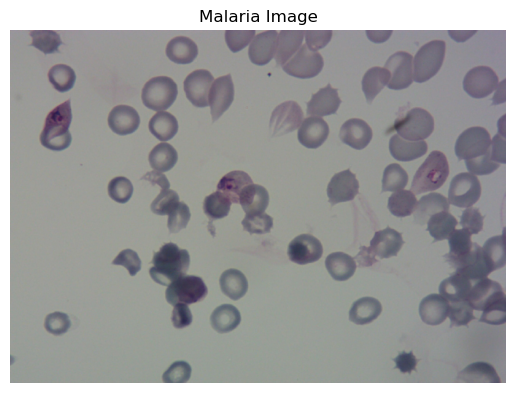

0154dd8e-72f8-4d78-a4dd-93e139577bd1.png
malaria/images\0154dd8e-72f8-4d78-a4dd-93e139577bd1.png


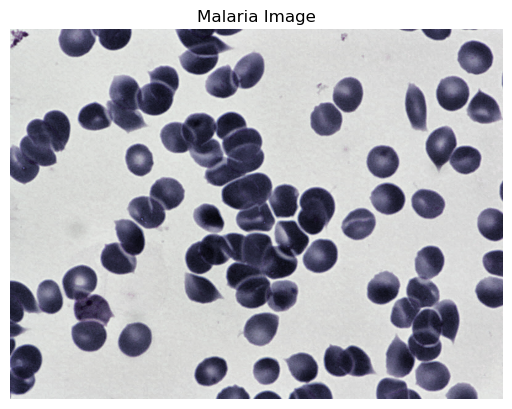

01b38a56-13eb-447b-89ee-fc21cb40dcc1.png
malaria/images\01b38a56-13eb-447b-89ee-fc21cb40dcc1.png


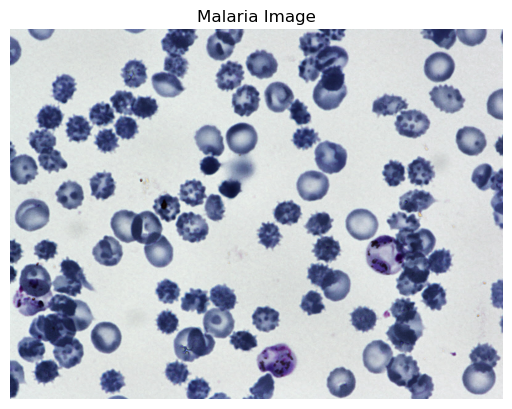

In [18]:
original_images = os.listdir(path_images)


for i in range(0, 10):
    print(original_images[i])
    path_image = os.path.join(path_images, original_images[i])

    print(path_image)

    img = plt.imread(path_image)
    plt.imshow(img)
    plt.axis('off')  # Hide axes for cleaner display
    plt.title('Malaria Image')
    plt.show()

In [22]:
path_files  = 'malaria'
print(os.listdir(path_files))
# path_image = os.path.join(path_images, original_images[i])
# for os.listdir(path_files):
#     print(os.listdir(path_files))

['images', 'test.json', 'training.json']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image # Using PIL for image manipulation
import os
import json # Import the json library to load your .json files

# --- Configuration for your project ---
# IMPORTANT: Replace 'path/to/your/images' with the actual path to your 'images' folder.
# For example, if 'images' is in the same directory as your script, use 'images'.
IMAGE_DIRECTORY = 'malaria\images'

# IMPORTANT: Specify the path to your JSON file containing bounding box data.
# You can choose 'test.json' or 'training.json' based on what you want to plot.
BOUNDING_BOX_JSON_FILE = 'malaria\test.json' # Or 'training.json'

# --- 1. Load Bounding Box Data from JSON ---
bounding_box_data = {}
try:
    with open(BOUNDING_BOX_JSON_FILE, 'r') as f:
        # Assuming your JSON is a dictionary where keys are image filenames
        # and values are lists of bounding box dictionaries.
        # Each bounding box dict should contain 'x_min', 'y_min', 'width', 'height', 'label'.
        bounding_box_data = json.load(f)
    print(f"Successfully loaded bounding box data from {BOUNDING_BOX_JSON_FILE}")
except FileNotFoundError:
    print(f"Error: {BOUNDING_BOX_JSON_FILE} not found. Please ensure the file exists in the correct path.")
    exit() # Exit if the JSON file is not found, as we can't proceed without it
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {BOUNDING_BOX_JSON_FILE}. Check file format.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading JSON: {e}")
    exit()

# --- 2. Get list of images to process ---
original_images = []
if os.path.exists(IMAGE_DIRECTORY):
    original_images = [f for f in os.listdir(IMAGE_DIRECTORY) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"Found {len(original_images)} images in '{IMAGE_DIRECTORY}'.")
else:
    print(f"Error: Image directory '{IMAGE_DIRECTORY}' not found. Please ensure the path is correct.")
    exit()

# --- 3. Iterate through your images and plot bounding boxes ---

print("\nProcessing images and plotting bounding boxes:")

# Limit to first 10 images for demonstration, you can remove this for all images
# or adjust the range as needed.
images_to_process = original_images[:10] if len(original_images) > 10 else original_images

for image_filename in images_to_process:
    path_image = os.path.join(IMAGE_DIRECTORY, image_filename)

    if not os.path.exists(path_image):
        print(f"Warning: Image not found at {path_image}. Skipping.")
        continue

    print(f"\nLoading image: {image_filename}")
    img_pil = Image.open(path_image) # Use PIL to open for easy cropping (if needed later)
    img_np = plt.imread(path_image) # Use matplotlib for display

    # Retrieve bounding boxes relevant to the current image from the loaded JSON data
    # Ensure the image_filename matches the keys in your JSON data (e.g., 'image1.png' vs 'image1')
    # You might need to adjust `image_filename` if your JSON keys are different (e.g., just the name without extension)
    image_bboxes = bounding_box_data.get(image_filename, [])

    if not image_bboxes:
        print(f"No bounding boxes found for {image_filename} in {BOUNDING_BOX_JSON_FILE}. Displaying original image without boxes.")
        plt.figure(figsize=(8, 6))
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original Image: {image_filename} (No Bounding Boxes Found)')
        plt.show()
        continue

    # Display the original image with bounding boxes overlaid for context
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(img_np)
    ax.set_title(f'Image with Bounding Boxes: {image_filename}')
    ax.axis('off')

    for i, bbox in enumerate(image_bboxes):
        try:
            x_min = bbox['x_min']
            y_min = bbox['y_min']
            width = bbox['width']
            height = bbox['height']
            label = bbox.get('label', 'Unknown') # Use .get() for label, in case it's missing

            # Draw the bounding box on the original image
            rect = patches.Rectangle((x_min, y_min), width, height,
                                     linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)
            ax.text(x_min, y_min - 5, label, color='lime', fontsize=10, weight='bold',
                    bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=1)) # Add background for text readability
            print(f"  Plotted bounding box for {label} at ({x_min}, {y_min}) for {image_filename}")

        except KeyError as ke:
            print(f"  Warning: Bounding box data for {image_filename} is missing key: {ke}. Skipping this box.")
        except Exception as ex:
            print(f"  An error occurred while plotting a bounding box for {image_filename}: {ex}. Skipping this box.")

    plt.show() # Show the image with drawn bounding boxes

    # If you still want to extract and display cropped cells, you can uncomment this part.
    # It uses the same logic as before, but now with your loaded data.
    # cropped_cells = []
    # for i, bbox in enumerate(image_bboxes):
    #     try:
    #         x_min = bbox['x_min']
    #         y_min = bbox['y_min']
    #         width = bbox['width']
    #         height = bbox['height']
    #         label = bbox.get('label', 'Unknown')
    #         cropped_cell_pil = img_pil.crop((x_min, y_min, x_min + width, y_min + height))
    #         cropped_cells.append({'image': cropped_cell_pil, 'label': label, 'bbox_id': i})
    #     except Exception as e:
    #         print(f"  Error cropping cell {i+1} from {image_filename}: {e}")

    # if cropped_cells:
    #     print(f"\nDisplaying extracted cells from {image_filename}:")
    #     for cell_data in cropped_cells:
    #         plt.figure(figsize=(4, 4))
    #         plt.imshow(cell_data['image'])
    #         plt.axis('off')
    #         plt.title(f'Extracted Cell: {cell_data["label"]} (BBox {cell_data["bbox_id"] + 1})')
    #         plt.show()

print("\nFinished plotting bounding boxes for selected images.")
